In [37]:
# import libraries
import os
import sys
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits import mplot3d
plt.style.use('seaborn-poster')
import seaborn as sns
# for creating a responsive plot
# %matplotlib widget

In [38]:
# variables
folder = f"C:/Users/anani/Downloads/Projects 2021_22/Code"
sys.path.append(folder)
from utils import reduce_pca, reduce_tsne, reduce_umap, plot_instance_space_2d
from clustering import kmeans_tuning, avg_silhouette_score_plot, sample_silhouette_score_plot, kmeans_distorsion, kmeans

In [39]:
experiment = "experiment_2"

In [40]:
# define directories
project_folder = f"C:/Users/anani/Downloads/Projects 2021_22/generalisability_index"
data_folder= f"{project_folder}/Data/preprocessed/{experiment}"

clustering_folder = f"{project_folder}/Results/{experiment}/clustering"
os.makedirs(clustering_folder, exist_ok=True)

In [41]:
# load data
features = pd.read_csv(f"{data_folder}/ela_preprocessed.csv"
                      , index_col = ["benchmark_suite", "f_id", "i_id"])
features.head()

disp.ratio_mean_02  disp.ratio_mean_05  \
benchmark_suite f_id i_id                                           
bbob            1    1                0.62485             0.69035   
                     2                0.66480             0.72890   
                     3                0.66220             0.72970   
                     4                0.64655             0.71385   
                     5                0.63995             0.70860   

                           disp.ratio_mean_10  disp.ratio_mean_25  \
benchmark_suite f_id i_id                                           
bbob            1    1                0.74655             0.82845   
                     2                0.78425             0.86110   
                     3                0.78160             0.85805   
                     4                0.77075             0.84755   
                     5                0.76660             0.84495   

                           disp.ratio_median_02  disp.ratio_median_05  \
benchmark_suite f_id i_id                                               
bbob            1    1                  0.62830               0.69455   
                     2                  0.66635               0.73065   
                     3                  0.66330               0.73160   
                     4                  0.64955               0.71685   
                     5                  0.64290               0.71195   

                           disp.ratio_median_10  disp.ratio_median_25  \
benchmark_suite f_id i_id                                               
bbob            1    1                  0.75075               0.83235   
                     2                  0.78655               0.86245   
                     3                  0.78390               0.85995   
                     4                  0.77400               0.85045   
                     5                  0.76960               0.84810   

                           disp.diff_mean_02  disp.diff_mean_05  \
benchmark_suite f_id i_id                                         
bbob            1    1              -4.75180           -3.92260   
                     2              -4.24565           -3.43425   
                     3              -4.27945           -3.42400   
                     4              -4.47705           -3.62405   
                     5              -4.56125           -3.69155   

                           disp.diff_mean_10  disp.diff_mean_25  \
benchmark_suite f_id i_id                                         
bbob            1    1              -3.20995           -2.17310   
                     2              -2.73280           -1.75935   
                     3              -2.76640           -1.79855   
                     4              -2.90390           -1.93090   
                     5              -2.95620           -1.96410   

                           disp.diff_median_02  disp.diff_median_05  \
benchmark_suite f_id i_id                                             
bbob            1    1                -4.71590             -3.87465   
                     2                -4.23395             -3.41770   
                     3                -4.27390             -3.40645   
                     4                -4.44745             -3.59340   
                     5                -4.53190             -3.65655   

                           disp.diff_median_10  disp.diff_median_25  \
benchmark_suite f_id i_id                                             
bbob            1    1                -3.16255             -2.12685   
                     2                -2.70775             -1.74540   
                     3                -2.74260             -1.77625   
                     4                -2.86825             -1.89785   
                     5                -2.92405             -1.92725   

                           ela_meta.lin_simple.adj_r2  \
benchmark_suite f_id i_id                 

In [42]:
# preprocess data
scaler = StandardScaler()
features = pd.DataFrame(scaler.fit_transform(features), index = features.index, columns=features.columns.tolist())
features.head()

disp.ratio_mean_02  disp.ratio_mean_05  \
benchmark_suite f_id i_id                                           
bbob            1    1              -1.511856           -1.568796   
                     2              -1.164069           -1.152534   
                     3              -1.186703           -1.143896   
                     4              -1.322945           -1.315044   
                     5              -1.380402           -1.371733   

                           disp.ratio_mean_10  disp.ratio_mean_25  \
benchmark_suite f_id i_id                                           
bbob            1    1              -1.601089           -1.644232   
                     2              -1.095714           -0.985084   
                     3              -1.131238           -1.046658   
                     4              -1.276684           -1.258635   
                     5              -1.332315           -1.311125   

                           disp.ratio_median_02  disp.ratio_median_05  \
benchmark_suite f_id i_id                                               
bbob            1    1                -1.433160             -1.486900   
                     2                -1.108428             -1.102148   
                     3                -1.134458             -1.092023   
                     4                -1.251805             -1.249228   
                     5                -1.308559             -1.301452   

                           disp.ratio_median_10  disp.ratio_median_25  \
benchmark_suite f_id i_id                                               
bbob            1    1                -1.521860             -1.568150   
                     2                -1.045184             -0.957986   
                     3                -1.080469             -1.008664   
                     4                -1.212287             -1.201241   
                     5                -1.270873             -1.248878   

                           disp.diff_mean_02  disp.diff_mean_05  \
benchmark_suite f_id i_id                                         
bbob            1    1              0.577269           0.577203   
                     2              0.595243           0.598750   
                     3              0.594043           0.599202   
                     4              0.587026           0.590376   
                     5              0.584036           0.587397   

                           disp.diff_mean_10  disp.diff_mean_25  \
benchmark_suite f_id i_id                                         
bbob            1    1              0.580415           0.581556   
                     2              0.606569           0.615825   
                     3              0.604727           0.612578   
                     4              0.597190           0.601616   
                     5              0.594324           0.598866   

                           disp.diff_median_02  disp.diff_median_05  \
benchmark_suite f_id i_id                                             
bbob            1    1                0.578972             0.581644   
                     2                0.595928             0.601687   
                     3                0.594523             0.602181   
                     4                0.588417             0.593981   
                     5                0.585445             0.591211   

                           disp.diff_median_10  disp.diff_median_25  \
benchmark_suite f_id i_id                                             
bbob            1    1                0.586139             0.588891   
                     2                0.610999             0.620560   
                     3                0.609094             0.617999   
                     4                0.602226             0.607903   
                     5                0.599176             0.605462   

                           ela_meta.lin_simple.adj_r2  \
benchmark_suite f_id i_id                 

Preview data PCA:
  benchmark_suite  f_id  i_id      dim0      dim1
0            bbob     1     1 -3.836959 -3.111295
1            bbob     1     2 -4.623190 -1.080556
2            bbob     1     3 -4.524683 -1.239380
3            bbob     1     4 -4.056709 -1.764172
4            bbob     1     5 -4.449532 -2.116695
(219, 5)
Pca explained_variance_:  [19.44583621 10.67280825]
Pca explained_variance_ratio_:  [0.31221036 0.17135603]
Pca explained_variance_ratio  sum:  0.4835663936251043


C:\Users\anani\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\anani\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Preview data TSNE: 
  benchmark_suite  f_id  i_id       dim0       dim1
0            bbob     1     1  14.725322  22.627428
1            bbob     1     2  12.576824  21.131815
2            bbob     1     3  13.195084  20.537924
3            bbob     1     4  12.815847  22.067682
4            bbob     1     5  14.041340  21.786194
(219, 5)
Preview data UMAP: 
  benchmark_suite  f_id  i_id       dim0      dim1
0            bbob     1     1  16.669897  5.010889
1            bbob     1     2  17.508711  5.866261
2            bbob     1     3  17.301889  5.706480
3            bbob     1     4  17.267057  5.604733
4            bbob     1     5  17.136990  5.382977
(219, 5)


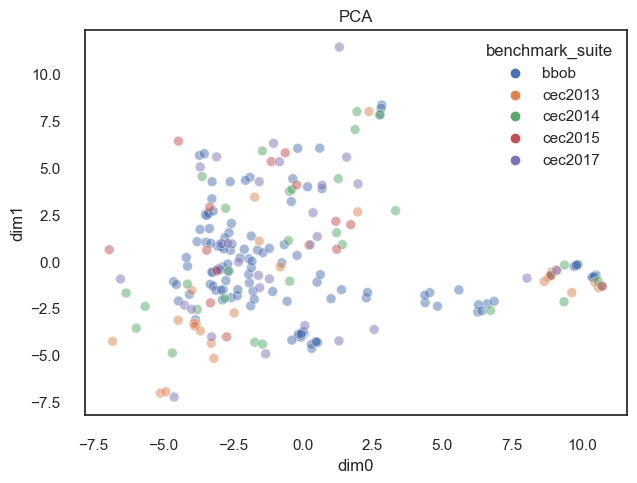

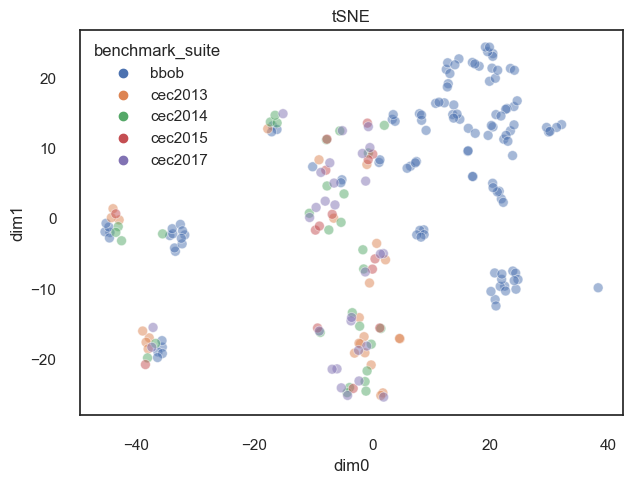

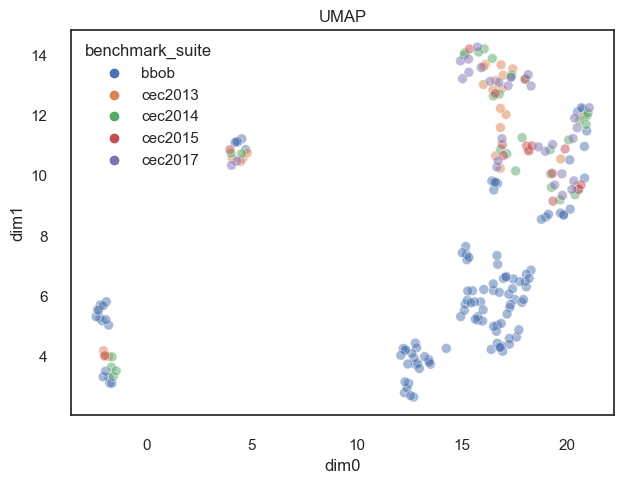

In [43]:
# dimensionality reduction to 2D
pca, data_2d_pca = reduce_pca(features, n_components=2
                     , title=f"features_2d_pca"
                     , save_path=f"{clustering_folder}")

tsne, data_2d_tsne = reduce_tsne(features, n_components=2, perplexity=10, n_iter=500
                          , title=f"features_2d_tsne"
                          , save_path=f"{clustering_folder}")

umap, data_2d_umap = reduce_umap(features, n_components=2, n_neighbors=10
                           , min_dist=0.3, metric="cosine"
                          , title=f"features_2d_umap"
                          , save_path=f"{clustering_folder}")
 
# concat into a list
data_2ds = [data_2d_pca, data_2d_tsne, data_2d_umap]
labels = ["PCA", "tSNE", "UMAP"]

# plot ELA representation of problems in 2D using all dim reduction techniques
for k in range(len(data_2ds)):

    # scatterplot 2d
    sns.set()
    sns.set_theme(style='white', font_scale=1)
    plt.figure(figsize=(7, 5))
    
    sns.scatterplot(data=data_2ds[k], x="dim0", y="dim1", hue="benchmark_suite", alpha=0.5, s = 50)

    # annotate
#     for line in range(0, data_2ds[k].shape[0]):
#         text = plt.annotate(str(data.loc[line, "f_id"]), (data.dim0[line] + 0.01, data.dim1[line])) #, fontsize=10
#         text.set_alpha(.6)
    plt.title(labels[k])
    plt.savefig(f"{clustering_folder}/features_2d_{labels[k]}.png", bbox_inches='tight', dpi=300)

    plt.show()
#     plt.close()

Preview data PCA:
  benchmark_suite  f_id  i_id      dim0      dim1      dim2
0            bbob     1     1 -3.836959 -3.111295 -3.853500
1            bbob     1     2 -4.623190 -1.080556 -3.458122
2            bbob     1     3 -4.524683 -1.239380 -3.587955
3            bbob     1     4 -4.056709 -1.764172 -3.439993
4            bbob     1     5 -4.449532 -2.116695 -3.771517
(219, 6)
Pca explained_variance_:  [19.44583621 10.67280825  7.16688148]
Pca explained_variance_ratio_:  [0.31221036 0.17135603 0.11506703]
Pca explained_variance_ratio  sum:  0.598633425766938


C:\Users\anani\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\anani\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Preview data TSNE: 
  benchmark_suite  f_id  i_id       dim0       dim1       dim2
0            bbob     1     1 -44.581417  58.650181 -26.347151
1            bbob     1     2  -8.028905  36.111320  40.003708
2            bbob     1     3 -52.246014  42.112293   8.274381
3            bbob     1     4 -38.359005  45.777786  11.383430
4            bbob     1     5 -44.761417  43.556866  -0.205257
(219, 6)
Preview data UMAP: 
  benchmark_suite  f_id  i_id       dim0      dim1      dim2
0            bbob     1     1  10.202977  3.033946  1.267513
1            bbob     1     2  10.262459  3.726479  0.934968
2            bbob     1     3  10.066898  3.557626  0.667530
3            bbob     1     4  10.309796  3.399481  1.052044
4            bbob     1     5  10.132475  3.258137  0.963668
(219, 6)
bbob
cec2013
cec2014
cec2015
cec2017


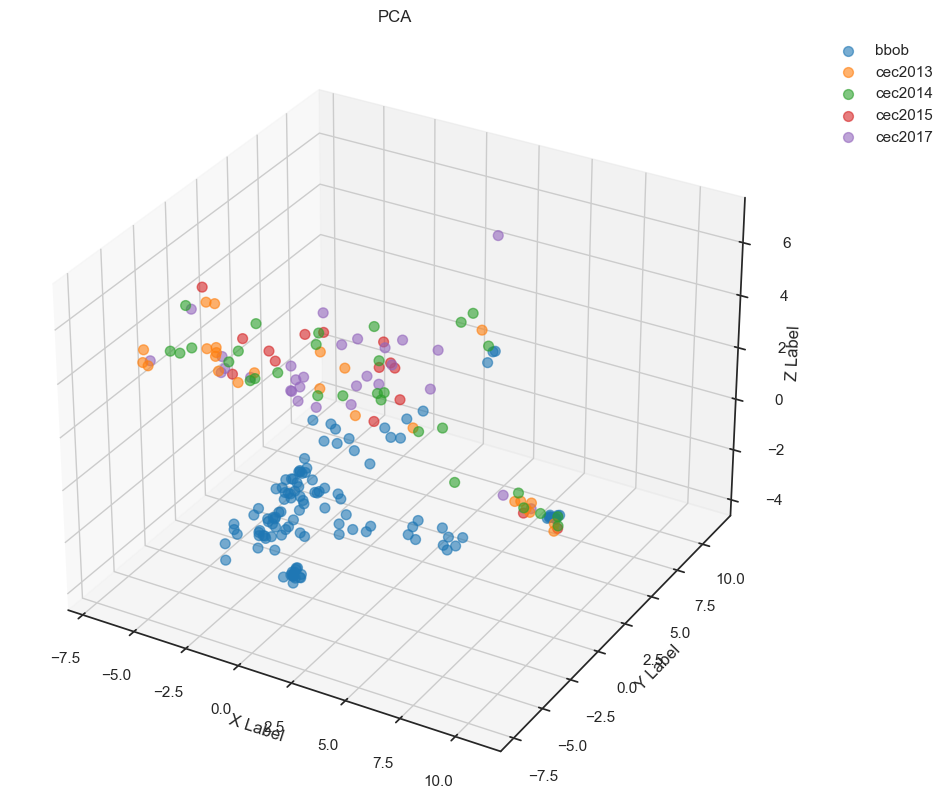

bbob
cec2013
cec2014
cec2015
cec2017


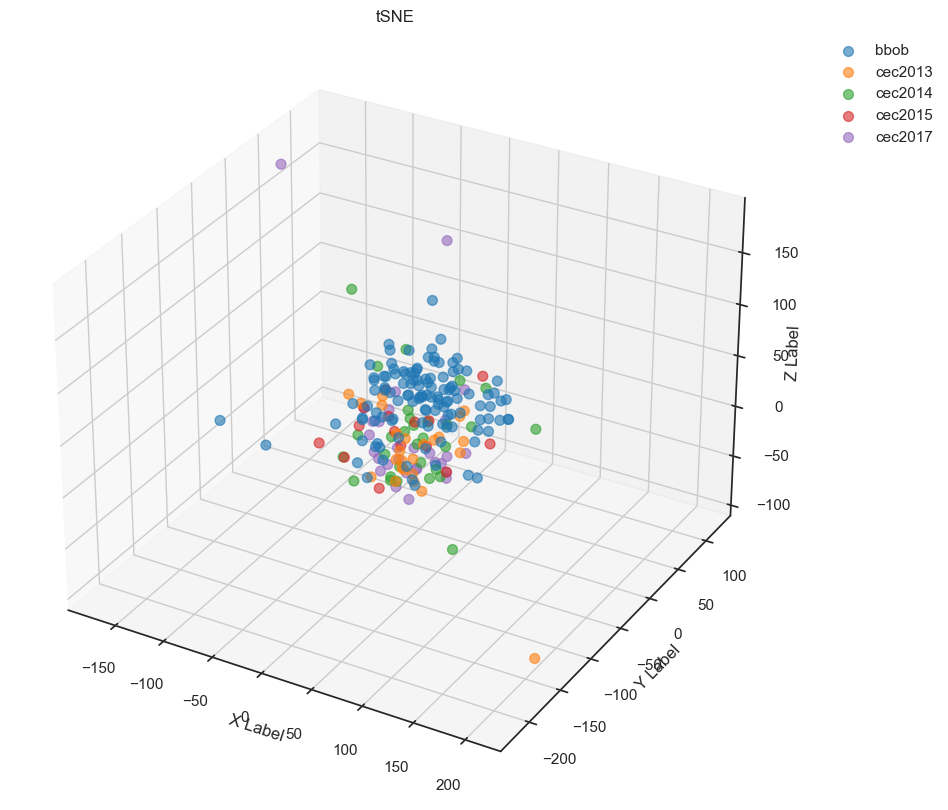

bbob
cec2013
cec2014
cec2015
cec2017


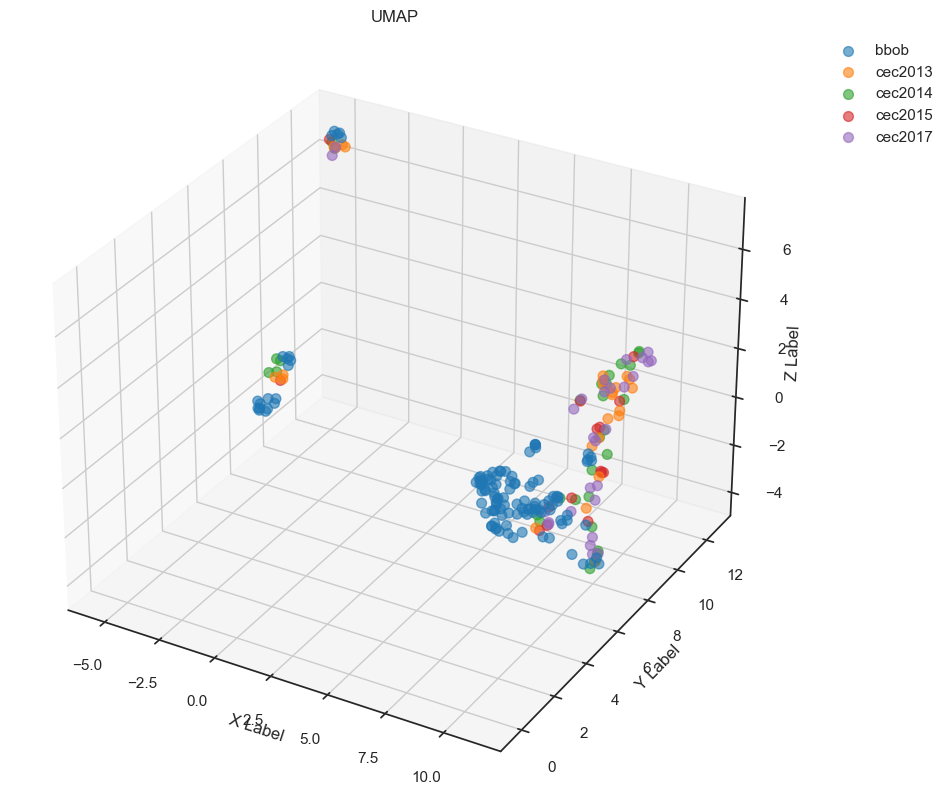

In [44]:
# dimensionality reduction to 3D
pca, data_3d_pca = reduce_pca(features, n_components=3
                     , title=f"features_3d_pca"
                     , save_path=f"{clustering_folder}")

tsne, data_3d_tsne = reduce_tsne(features, n_components=3, perplexity=10, n_iter=500
                          , title=f"features_3d_tsne"
                          , save_path=f"{clustering_folder}")
 

umap, data_3d_umap = reduce_umap(features, n_components=3, n_neighbors=10
                           , min_dist=0.3, metric="cosine"
                          , title=f"features_3d_umap"
                          , save_path=f"{clustering_folder}")
 
# concat into a list
data_3ds = [data_3d_pca, data_3d_tsne, data_3d_umap]
data_labels = ["PCA", "tSNE", "UMAP"];
labels = ['bbob', 'cec2013', 'cec2014', 'cec2015', 'cec2017']
colors = ["tab:blue","tab:orange","tab:green","tab:red","tab:purple"]

# plot
for k in range(len(data_3ds)):
    
    data = data_3ds[k]
    
    # scatterplot 2d
    fig = plt.figure(figsize = (10, 10))
    ax = plt.axes(projection='3d')
    ax.grid()

    # plot
    for i, suite in enumerate(data["benchmark_suite"].unique()):
        print(suite)
        
        data_temp = data[data["benchmark_suite"]==suite].reset_index()
        
        x = data_temp["dim0"].values
        y = data_temp["dim1"].values
        z = data_temp["dim2"].values

        ax.scatter(x, y, z, s=50,  marker='o', c=colors[i], label=labels[i], alpha=0.6)
        ax.set_xlabel('X Label')
        ax.set_ylabel('Y Label')
        ax.set_zlabel('Z Label')
        ax.set_title(data_labels[k])
    
    # legend
    plt.legend( bbox_to_anchor=(1.05, 1), loc=2)
    
    # save
    plt.savefig(f"{clustering_folder}/features_3d_{data_labels[k]}.png", bbox_inches='tight', dpi=300)

    plt.show()
    plt.close()

In [45]:
# perform k-means tunning
avg_silhouette_scores, sample_silhouette_scores, distortions = kmeans_tuning(data=features)

C:\Users/anani/Downloads/Projects 2021_22/Code\clustering.py:347: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  avg_silhouette_score = avg_silhouette_score.append({'n_clusters': n, 'silhouette_score': silhouette_score(data_clustering, labels)}, ignore_index=True)
C:\Users/anani/Downloads/Projects 2021_22/Code\clustering.py:349: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  distortions = distortions.append({'n_clusters': n, 'distortion': k_means.inertia_}, ignore_index=True)
C:\Users/anani/Downloads/Projects 2021_22/Code\clustering.py:347: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  avg_silhouette_score = avg_silhouette_score.append({'n_clusters': n, 'silhouette_score': silhouette_score(data_clustering, labels)}, ignore_in

C:\Users/anani/Downloads/Projects 2021_22/Code\clustering.py:347: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  avg_silhouette_score = avg_silhouette_score.append({'n_clusters': n, 'silhouette_score': silhouette_score(data_clustering, labels)}, ignore_index=True)
C:\Users/anani/Downloads/Projects 2021_22/Code\clustering.py:349: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  distortions = distortions.append({'n_clusters': n, 'distortion': k_means.inertia_}, ignore_index=True)
C:\Users/anani/Downloads/Projects 2021_22/Code\clustering.py:347: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  avg_silhouette_score = avg_silhouette_score.append({'n_clusters': n, 'silhouette_score': silhouette_score(data_clustering, labels)}, ignore_in

In [46]:
avg_silhouette_scores.head()

,n_clusters,silhouette_score
0,2.0,0.312638
1,3.0,0.284569
2,4.0,0.302877
3,5.0,0.259343
4,6.0,0.266510


In [47]:
sample_silhouette_scores.head()

,n_clusters,label,silhouette_score
"(bbob, 1, 1)",2,1,0.361948
"(bbob, 1, 2)",2,1,0.386590
"(bbob, 1, 3)",2,1,0.399452
"(bbob, 1, 4)",2,1,0.378621
"(bbob, 1, 5)",2,1,0.393029


<Figure size 1280x880 with 0 Axes>

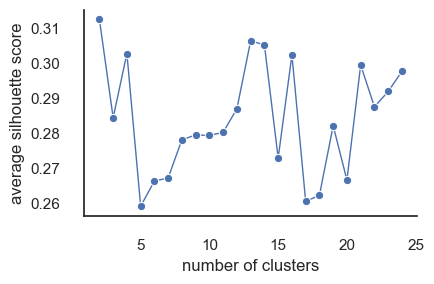

In [48]:
# plot silhouette scores
avg_silhouette_score_plot(silhouette_scores=avg_silhouette_scores, x='n_clusters', y="silhouette_score"
                          , font_scale=1, title=f"kmeans_avg_silhouette_score_tunning"
                          , save_path=f"{clustering_folder}", marker='o', linewidth=1, kind="line", height=3, aspect=1.5)

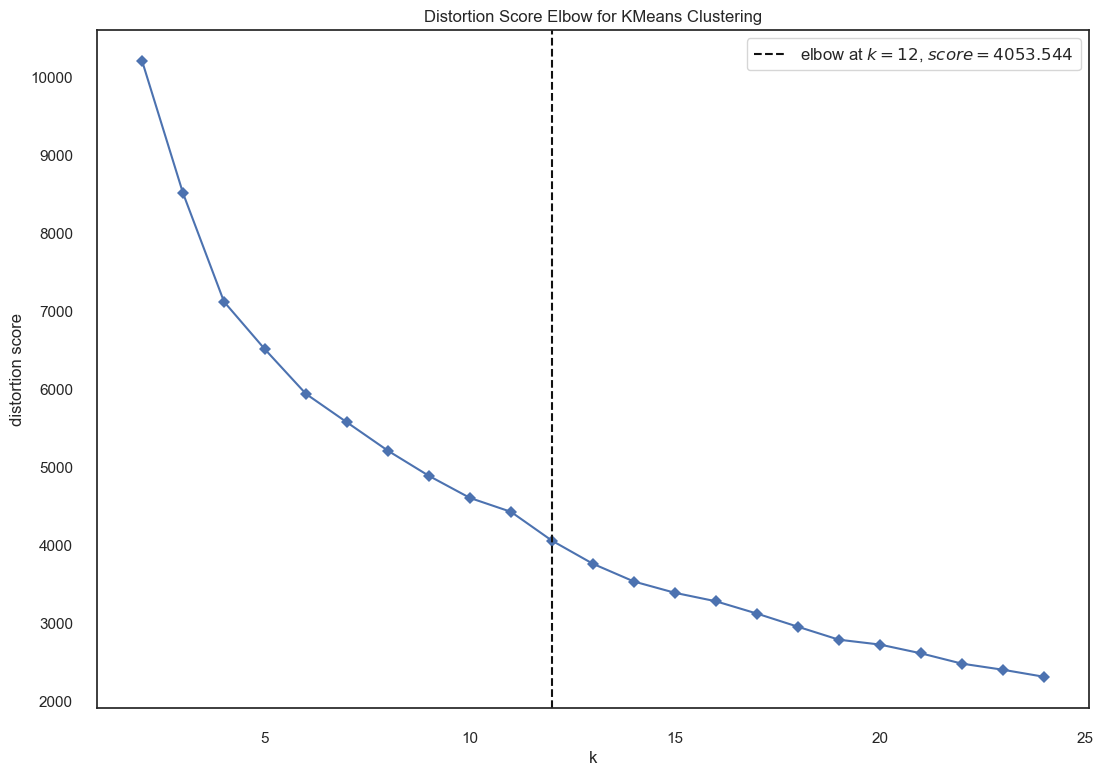

In [49]:
kmeans_distorsion(data=features, save_path=f"{clustering_folder}")

For n_clusters = 4 The average silhouette_score is : 0.30287658616228713


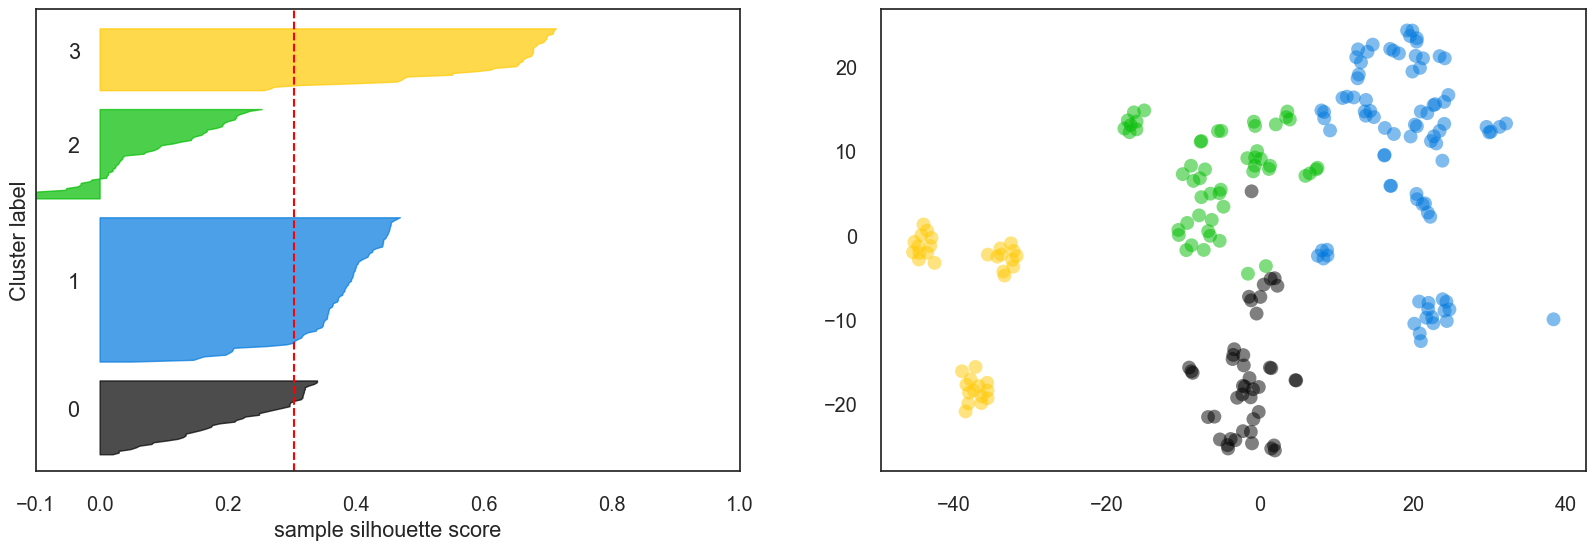

For n_clusters = 12 The average silhouette_score is : 0.2871651559515382


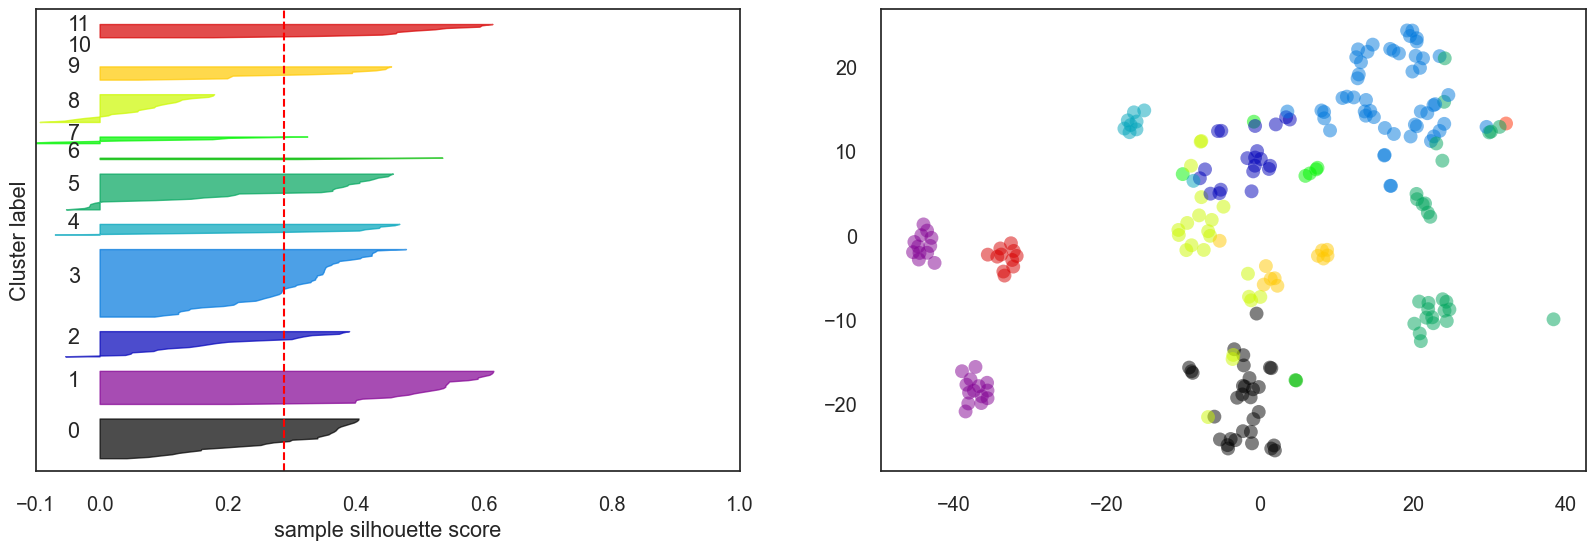

For n_clusters = 21 The average silhouette_score is : 0.2996297380271185


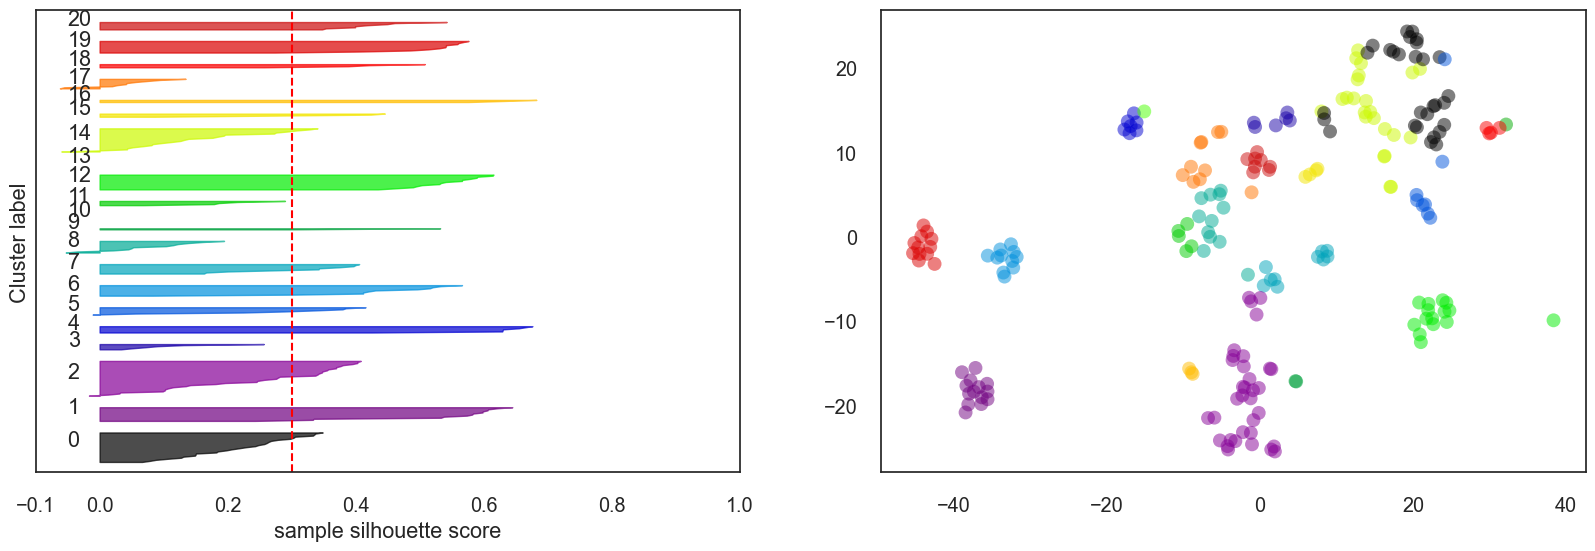

In [50]:
sample_silhouette_score_plot(X=features, data_2d=data_2d_tsne, sample_silhouette_scores=sample_silhouette_scores
                 , avg_silhouette_scores=avg_silhouette_scores
                 , range_n_clusters=[4, 12, 21], figsize=(5, 5), font_scale=1.3
                 , annotate = False
                 , save=True
                 , title=f"kmeans_sample_silhouette_score_tunning"
                 , save_path="C:/Users/anani/Downloads/Projects 2021_22/generalisability_index/Results",
                )

In [53]:
# perfrom final clustering
# n_clusters = 4

for n_clusters in [12]:
    k_means, dataset_clustered, data_labels = kmeans(data=features, n_clusters=n_clusters, title=f"kmeans_n_clusters={n_clusters}"
           , save_path=f"{clustering_folder}")
    
    print(data_labels["label"].unique())

For n_clusters = 12 The average silhouette_score is : 0.2871651559515382
Preview kmeans clustering: 
                           disp.ratio_mean_02  disp.ratio_mean_05  \
benchmark_suite f_id i_id                                           
bbob            1    1              -1.511856           -1.568796   
                     2              -1.164069           -1.152534   
                     3              -1.186703           -1.143896   
                     4              -1.322945           -1.315044   
                     5              -1.380402           -1.371733   

                           disp.ratio_mean_10  disp.ratio_mean_25  \
benchmark_suite f_id i_id                                           
bbob            1    1              -1.601089           -1.644232   
                     2              -1.095714           -0.985084   
                     3              -1.131238           -1.046658   
                     4              -1.276684           -1.258635   
 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

3
7
5
9
2
4
10
1
11
0
8
6


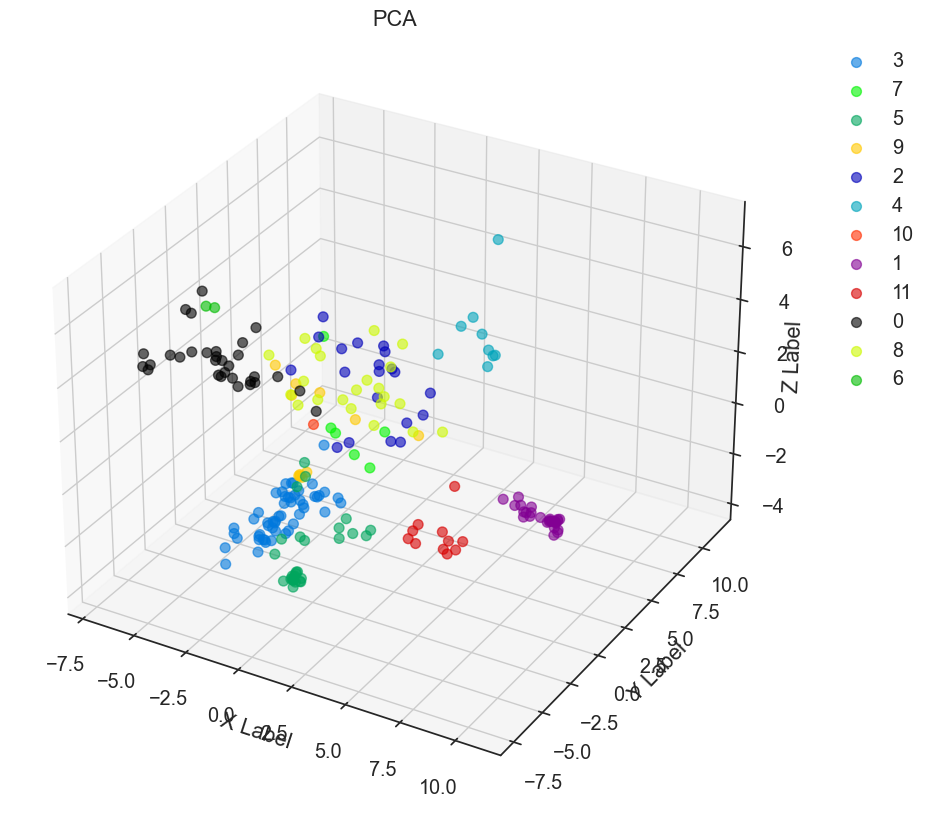

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

3
7
5
9
2
4
10
1
11
0
8
6


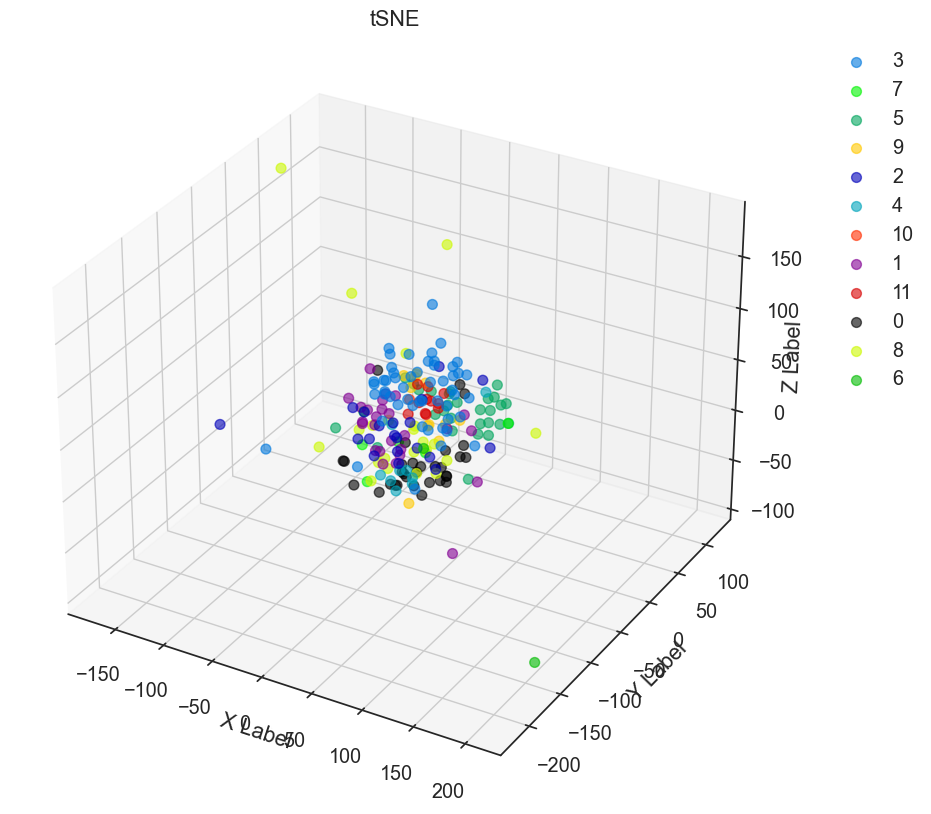

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

3
7
5
9
2
4
10
1
11
0
8
6


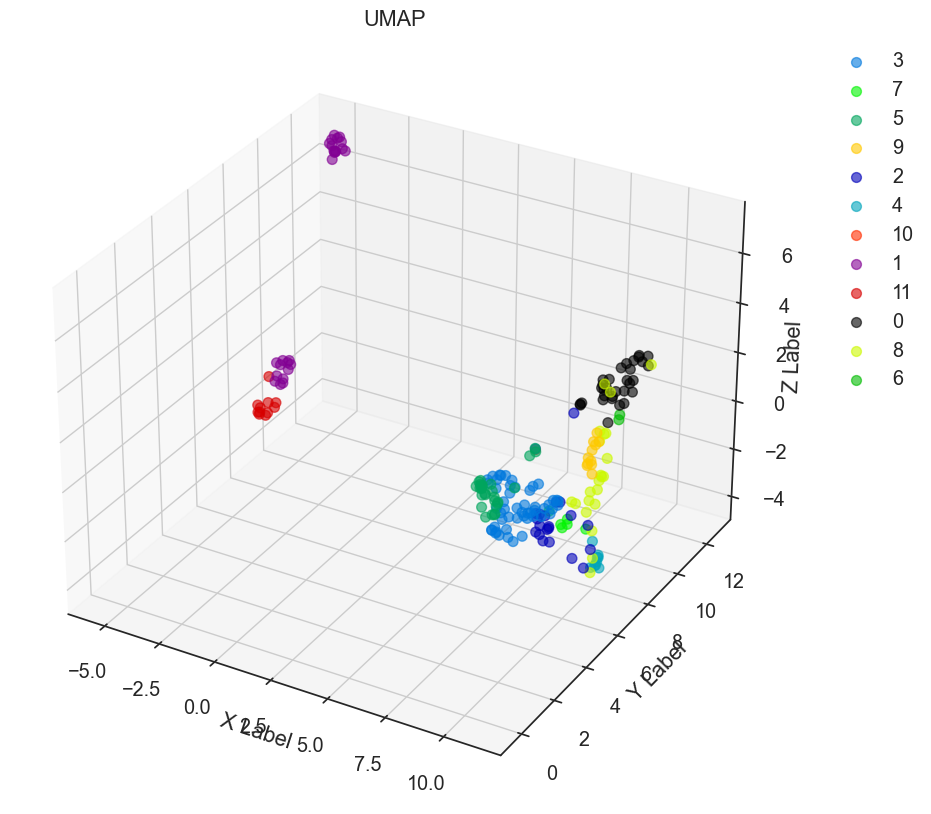

In [54]:
# plot labels in 3D
colors = ["tab:red","tab:blue","tab:green","tab:purple"]
labels = ["PCA", "tSNE", "UMAP"]

for k in range(len(data_3ds)):
    data = data_3ds[k]
    data = pd.merge(data.reset_index(), data_labels, how='left', on=["benchmark_suite", "f_id", "i_id"])
    
    # scatter plot 2d
    fig = plt.figure(figsize = (10, 10))
    ax = plt.axes(projection='3d')
    ax.grid()

    # plot
    for label in data_labels["label"].unique():
        print(label)
        
        data_temp = data[data["label"]==label].reset_index()
        
        x = data_temp["dim0"].values
        y = data_temp["dim1"].values
        z = data_temp["dim2"].values

        ax.scatter(x, y, z, s=50,  marker='o', c=cm.nipy_spectral(np.divide(label, len(data_labels["label"].unique()))), label=label, alpha=0.6)
        ax.set_xlabel('X Label')
        ax.set_ylabel('Y Label')
        ax.set_zlabel('Z Label')
    
    ax.set_title(labels[k])
    
    # legend
    plt.legend( bbox_to_anchor=(1.05, 1), loc=2)
    
    # save
    plt.savefig(f"{clustering_folder}/labels_3d_{labels[k]}.png", bbox_inches='tight', dpi=300)

    plt.show()
    plt.close()